Dataset shape: (1143, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9

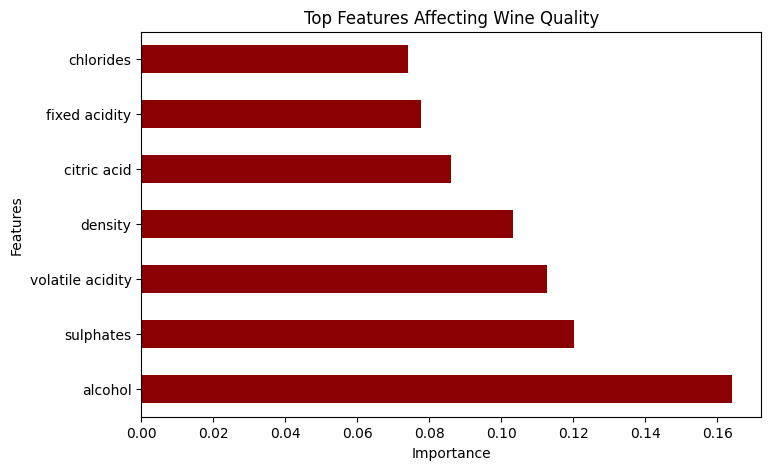

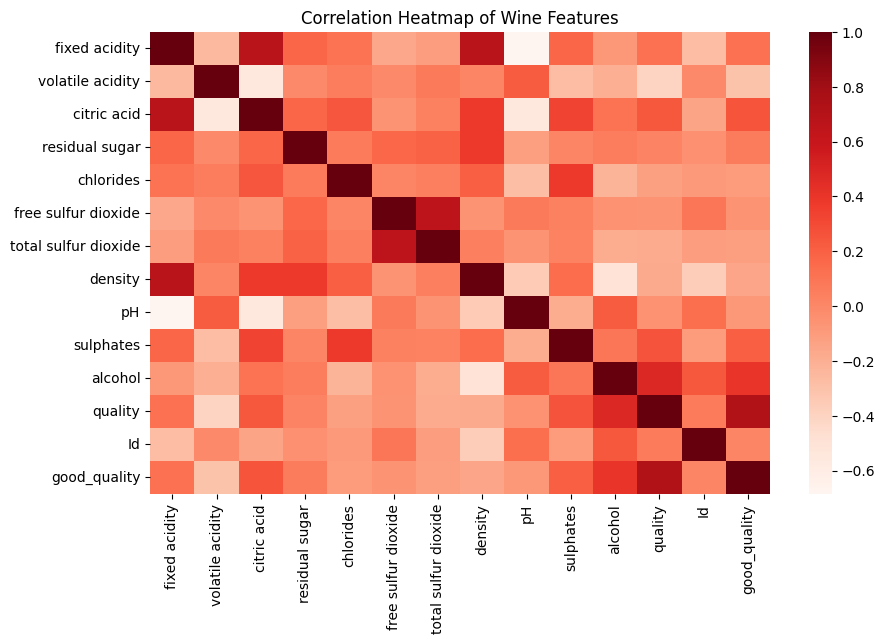

In [ ]:
# 🍇 Wine Quality Prediction Project (using your dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
df = pd.read_csv("WineQT.csv")
print("Dataset shape:", df.shape)
print(df.head())

# 2. Basic Info
print(df.info())

# 3. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 4. Convert quality into binary (1 = good wine, 0 = bad wine)
df['good_quality'] = [1 if q >= 7 else 0 for q in df['quality']]

# 5. Define features (X) and target (y)
X = df.drop(['quality', 'Id', 'good_quality'], axis=1, errors='ignore')
y = df['good_quality']

# 6. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluate model
print("\nAccuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Feature Importance
plt.figure(figsize=(8,5))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(7).plot(kind='barh', color='darkred')
plt.title("Top Features Affecting Wine Quality")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 11. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='Reds', annot=False)
plt.title("Correlation Heatmap of Wine Features")
plt.show()
